In [1]:
#%% Add to path
import sys
%cd ..

with open('python_paths.txt', 'r') as f:
    paths = f.read().splitlines()
for path in paths:
    if path not in sys.path:
        sys.path.append(path)

        
print(sys.path)
print(sys.executable)

/media/theodore/HDD1/These/projets/superpixels
['/media/theodore/HDD1/These/projets/superpixels/Notebooks', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '', '/media/theodore/HDD1/Spondi/SpondiDetect/venv/lib/python3.7/site-packages', '/media/theodore/HDD1/Spondi/SpondiDetect/venv/lib/python3.7/site-packages/SimpleITK-1.2.0rc2.dev1162+g2a79d-py3.7-linux-x86_64.egg', '/media/theodore/HDD1/Spondi/SpondiDetect/venv/lib/python3.7/site-packages/IPython/extensions', '/home/theodore/.ipython', '.']
/media/theodore/HDD1/Spondi/SpondiDetect/venv/bin/python3


In [3]:
from importlib import reload

import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage

import src.plotter as p
import src.superpixel_models.slic as slic


In [41]:
img_path = "./data/img.jpg"

img = plt.imread(img_path)
img = (img - img.min()) / (img.max() - img.min())

In [70]:
img_path = "./data/img_spondi.npy"

img = np.load(img_path)
img = (img - img.min()) / (img.max() - img.min())

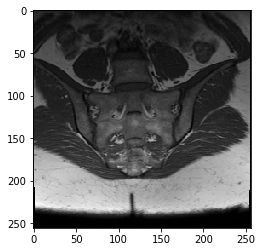

In [71]:
plt.imshow(img, cmap="gray")

# Slic

In [104]:
reload(slic)
model = slic.SLIC(K=100, m=.01, thresh=1, maxit=5)


Current iteration: 1 / 5. Error: 609.5244998310686
Current iteration: 2 / 5. Error: 225.39182623186133
Current iteration: 3 / 5. Error: 101.06489947271791
Current iteration: 4 / 5. Error: 41.47933379395827
Current iteration: 5 / 5. Error: 20.59969980111548


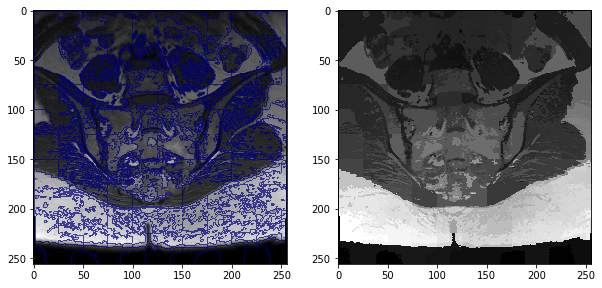

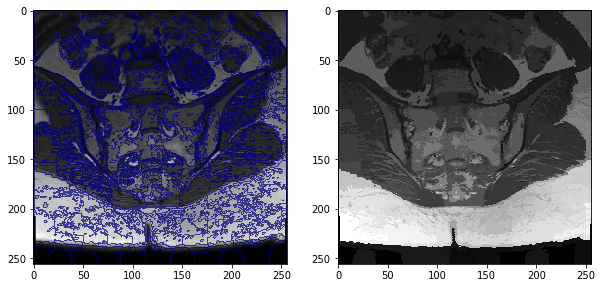

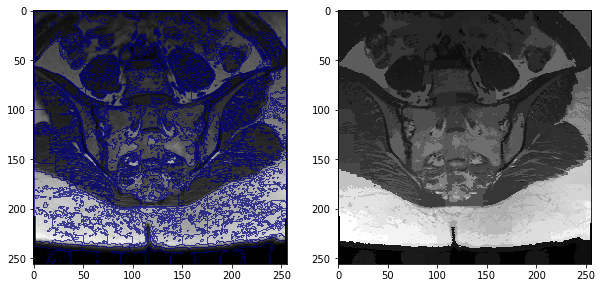

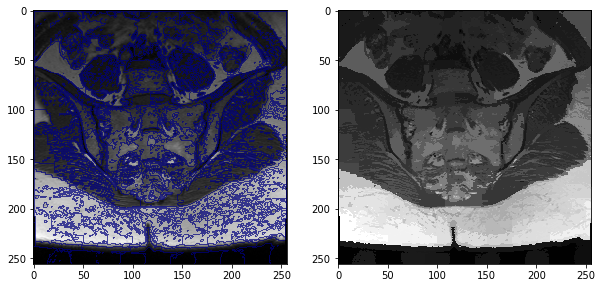

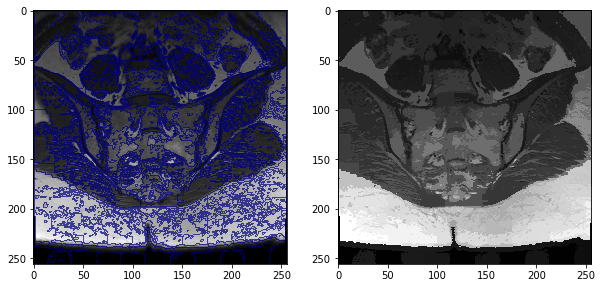

In [105]:
model.fit(img, True)

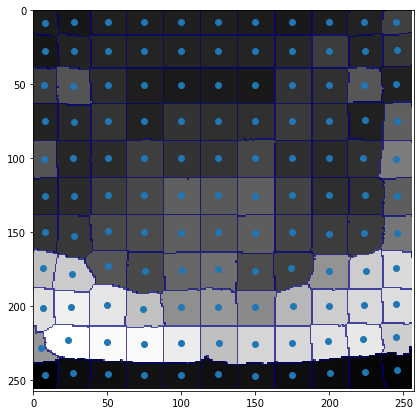

In [102]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
p.plot_img_mask_on_ax(ax, model.infer_superpixel_img(), model.infer_superpixel_edges())
ax.scatter(np.stack(model.centers)[:, 2], np.stack(model.centers)[:, 1])

ax.set_xlim(0, 257);
ax.set_ylim(257, 0);

(array([14.,  5.,  7.,  9., 15., 18., 14.,  6.,  6., 27.]),
 array([0.15195247, 0.22218486, 0.29241725, 0.36264964, 0.43288203,
        0.50311441, 0.5733468 , 0.64357919, 0.71381158, 0.78404397,
        0.85427635]),
 <a list of 10 Patch objects>)

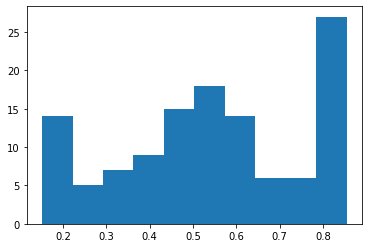

In [44]:
plt.hist(model.centers[:, 0])

(array([  607.,  8441.,  5618.,  8786.,  9627., 12757., 10329.,  4905.,
         5237.,   257.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

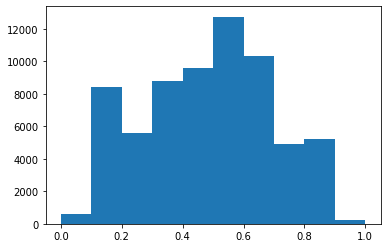

In [45]:
plt.hist(img[img==img])

In [59]:
im2 = model.infer_superpixel_img()

# My method